<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.


#### Project Title: The Sepsis Illness Classification Analysis

#### Project Description: This project seeks to create a classification model to classify patients Sepsis positive or negative 

#### Hypothesis: 
#### Null Hypothesis: H0: There is no relationship between high Body Mass Index and sepsis.
#### Alternate Hypothesis: H1: There is a relationship between high Body Mass Index and sepsis.
####



#### Assumptions:
1. It was assumed that the blood pressure used was the diastolic type.


#### Questions

1. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?
2. What is the distribution of ages for patients captured in the data?
3. How many of the patients fall under the Normal, Elevated and High Blood Pressure?
4. Is Body Mass Index affected by Age?
5. Is Blood Pressure affected by Age?
6. What is the relationship between Age and Body In
7. How many patients have the tendency of developing sepsis?
8. Which age group are more prone to developing sepsis?
9. Does having an insurance enhance patients chances of getting sepsis?
10. Is body mass directly correlated with a patients tendency to get sepsis?
11. Does the blood parameters associated with sepsis?

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from skopt import BayesSearchCV
from sklearn.utils import class_weight
# models 
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# model interpretation
import shap

import pickle
import os
import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
df = pd.read_csv('../datasets/Paitients_Files_Train.csv')
df.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# display the datatypes
df.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

>- **All the data types are of numeric data types**

In [5]:
# check the shape of the data
df.shape

(599, 11)

>- **The dataset has 11 columns and 599 rows**

In [6]:
# check for null values
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

>- **All rows had values**

In [7]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

>- **The columns are not descriptive**

In [8]:
# check the number of duplicates
df.duplicated().sum()

0

>- **There are no duplicates**

In [9]:
# create a function to print the number of unique values
def print_unique_values(data):
    values = {}
    for col in data.columns:
        number = data[col].nunique()
        print(f'{col}: has {number} of unique values')   

In [10]:
print_unique_values(df)

ID: has 599 of unique values
PRG: has 17 of unique values
PL: has 129 of unique values
PR: has 44 of unique values
SK: has 51 of unique values
TS: has 164 of unique values
M11: has 233 of unique values
BD2: has 437 of unique values
Age: has 50 of unique values
Insurance: has 2 of unique values
Sepssis: has 2 of unique values


In [11]:
def number_of_zeros(data):
    for col in data.columns:
        if col != 'Sepssis':
            count = (data[col] == 0).sum()
            print(f'Count of zeros in Column  {col} : {count}')

In [12]:
number_of_zeros(df)

Count of zeros in Column  ID : 0
Count of zeros in Column  PRG : 93
Count of zeros in Column  PL : 5
Count of zeros in Column  PR : 28
Count of zeros in Column  SK : 175
Count of zeros in Column  TS : 289
Count of zeros in Column  M11 : 9
Count of zeros in Column  BD2 : 0
Count of zeros in Column  Age : 0
Count of zeros in Column  Insurance : 188


>- **Although there were no null values in the columns, some of the columns had 0's in the them**

Observations from the data:

Quality Issues

>- The column names are not descripive

#### Rename the columns

In [13]:
df = df.rename(columns={'PRG': 'Plasma Glucose', 'PL': 'Blood Work Result-1',
                        'PR': 'Blood Pressure','SK': 'Blood Work Result-2',
                        'TS': 'Blood Work Result-3', 'M11': 'Body Mass Index',
                        'BD2': 'Blood Work Result-4'})

In [14]:
# Confirm the rename of columns
df.head()

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### Check statistics of the data using the describe() method

In [15]:
df.describe()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


>- **The mean age for the patients captured is 33.29. The mean blood pressure is 68.732888 mm hg which is lower than 80 mm hg, hence indicates that the patients had averagely a normal pressure**

#### Check the correlation between the various columns

In [16]:
# find the correlation between the columns
corr_matrix = df.corr()
corr_matrix

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
Plasma Glucose,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631
Blood Work Result-1,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993
Blood Pressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365
Blood Work Result-2,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360
Blood Work Result-3,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560
Body Mass Index,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826
Blood Work Result-4,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114
Age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000


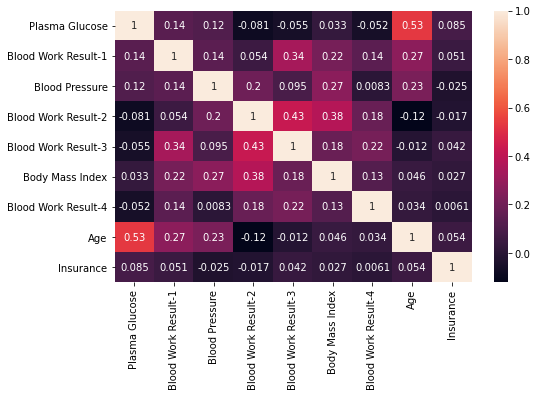

In [17]:
# Plot a heatmap for the correlations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show();

In [18]:
# get the minimum value
min_corr = corr_matrix.min().min()  
# get the columns involved
min_corr_cols = corr_matrix.unstack().idxmin()

print('The minimum correlation was:', min_corr)
print('The columns involved are:', min_corr_cols)

The minimum correlation was: -0.12155329275228288
The columns involved are: ('Blood Work Result-2', 'Age')


In [19]:
# get the minimum value
max_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
            .max().max())  
# get the maximum value (excluding same columns)
# get the columns involved
max_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack().idxmax()) 

print('The maximun correlation was:', max_corr)
print('The columns involved are:', max_corr_cols)

The maximun correlation was: 0.5325446086908504
The columns involved are: ('Plasma Glucose', 'Age')


>- **The lowest correlation is -0.12155329275228288 between Blood Work Result-2 and Age.** 

>- **The highest correlation is 0.5325446086908504 between Plasma Glucose and Age**

#### Verify label balance

In [20]:
# value count for values in Sepssis

label_counts = df['Sepssis'].value_counts()
label_counts

Negative    391
Positive    208
Name: Sepssis, dtype: int64

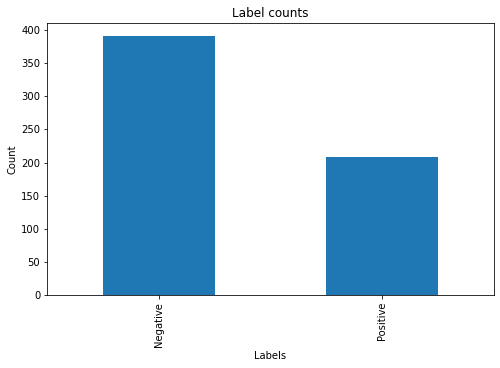

In [21]:
plt.figure(figsize=(8, 5))
label_counts.plot.bar()
plt.title('Label counts')
plt.xlabel('Labels')
plt.ylabel('Count');

>- **The number of patients who tested negative were almost twice as many as the ones that tested positve. Clearly the data is slightly unbalanced**

In [22]:
print(f"The maximum age is {df['Age'].max()} and minimum age {df['Age'].min()}.")
age_count = df['Age'].value_counts()
age_count

The maximum age is 81 and minimum age 21.


21    52
22    52
25    40
24    37
23    27
29    27
28    26
26    25
27    21
41    20
31    19
37    18
30    16
33    15
42    13
36    13
32    13
38    13
46    11
35    10
39    10
34     9
40     8
43     8
45     8
44     7
58     7
51     7
60     5
57     5
52     5
54     4
62     4
55     4
50     4
47     4
53     3
49     3
59     3
48     3
63     3
65     3
66     3
67     3
56     2
61     2
64     1
69     1
72     1
81     1
Name: Age, dtype: int64

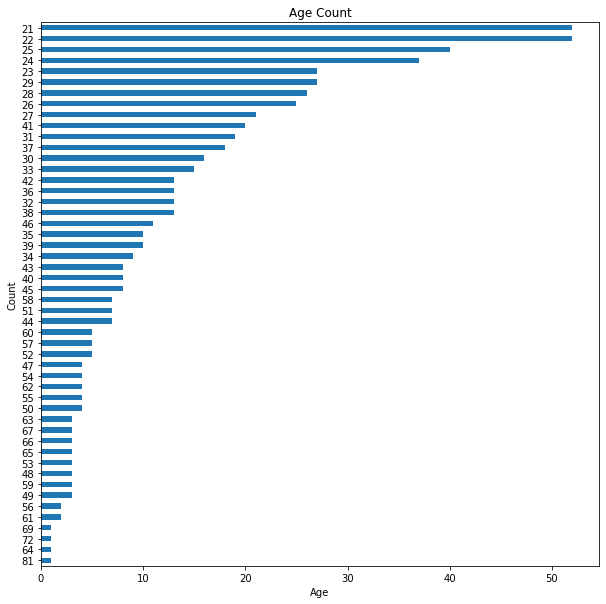

In [23]:
plt.figure(figsize=(10, 10))
age_count.sort_values(ascending=True).plot(kind='barh')
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count');

>- **52 of the patients were 22 years old, that was the hisghest number of times an age occured**

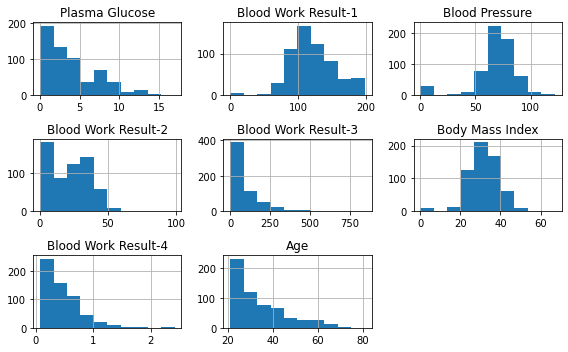

In [24]:
df.drop(columns=['Insurance']).hist(figsize=(8, 5))
plt.tight_layout()
plt.show()

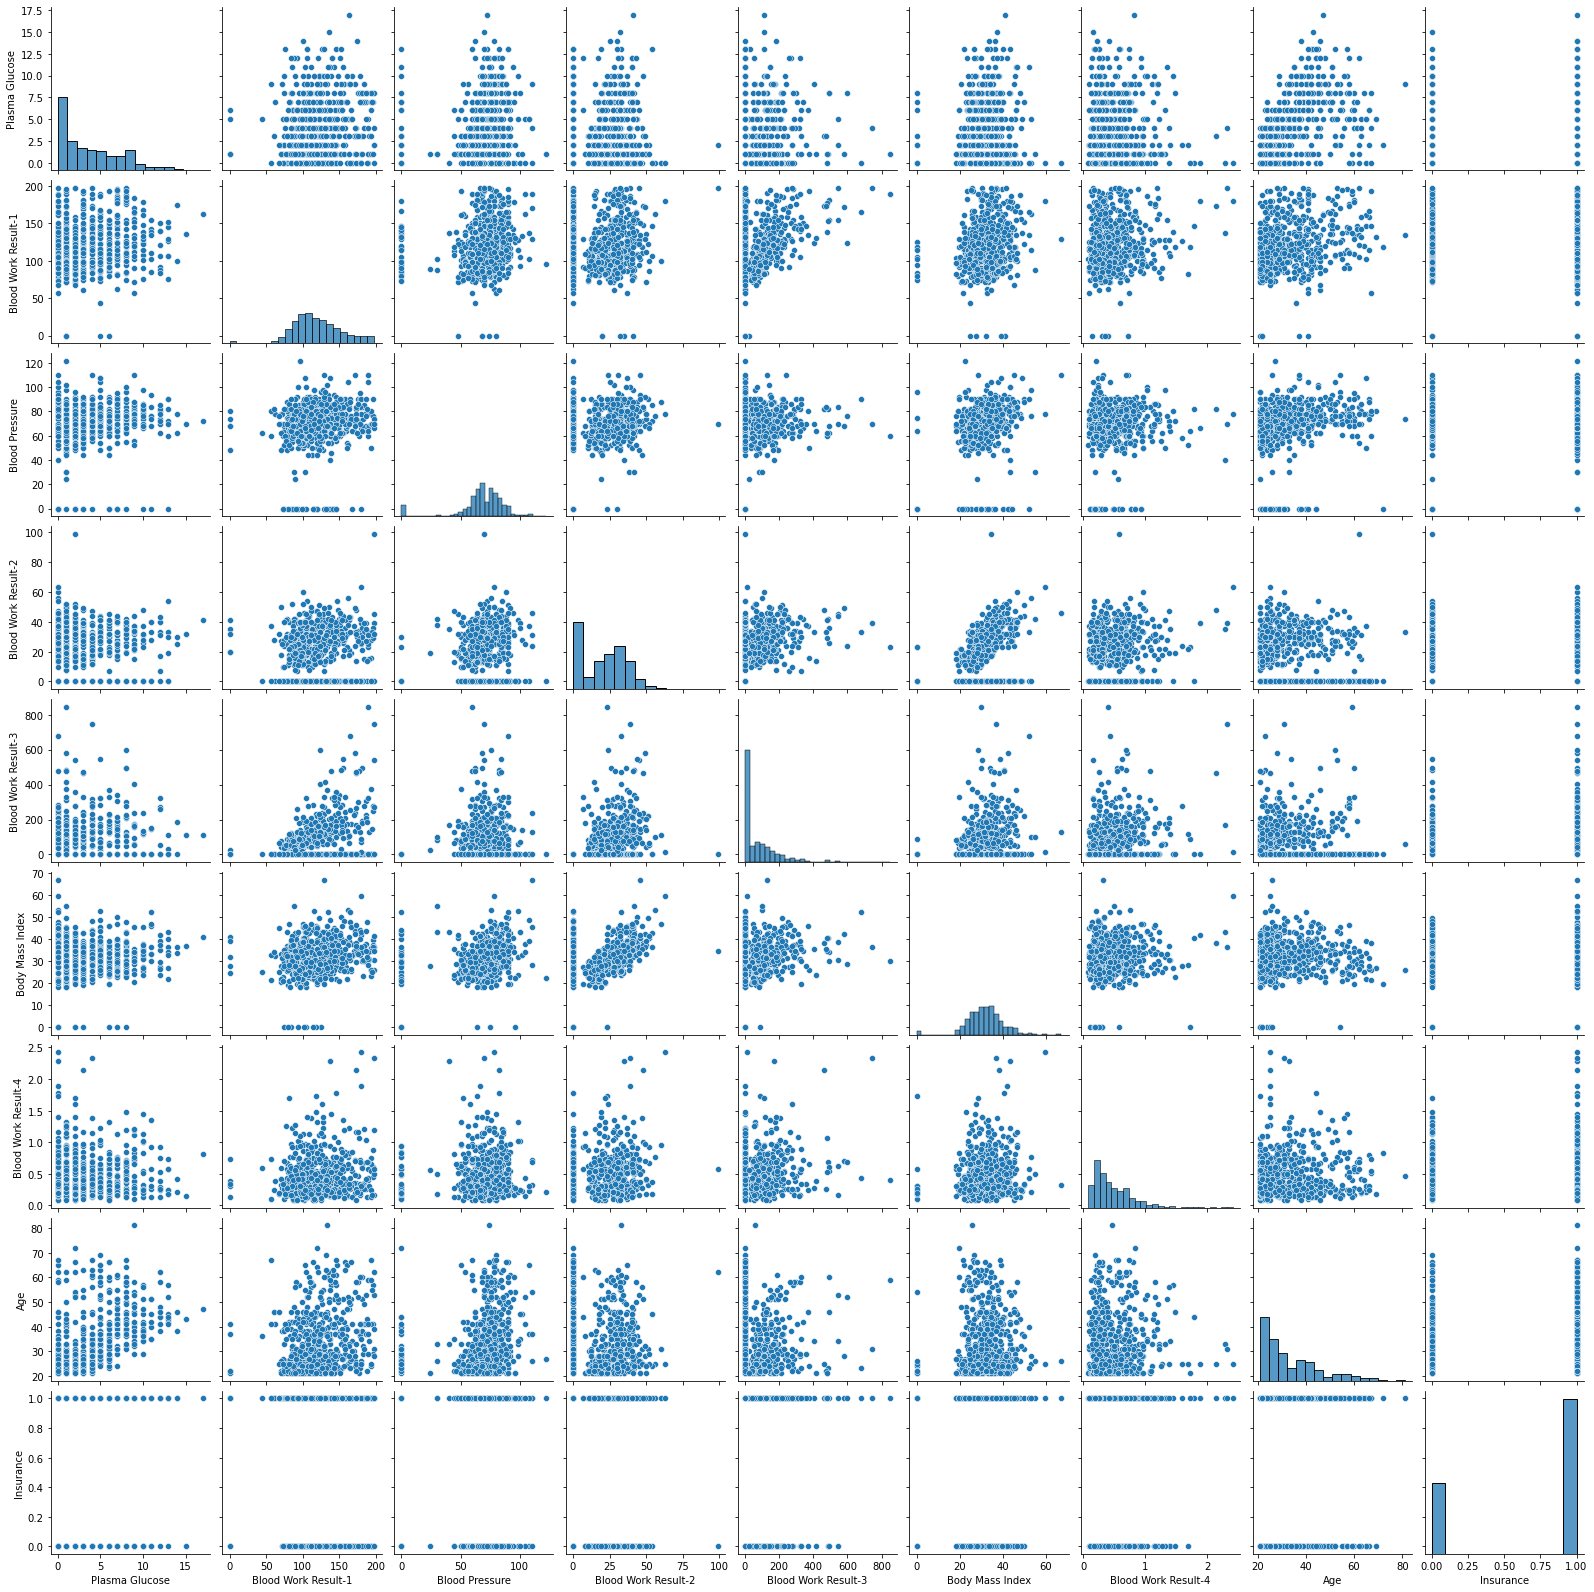

In [25]:
# Create pair plot
sns.pairplot(df)
plt.show()

### Hypothesis Testing

In [202]:
import scipy.stats as stats

# Select the BMI and sepsis columns from the dataset
bmi = df['Body Mass Index']
sepsis = (df['Sepssis'] == 'Positive').astype(bool).astype(int)

# Perform correlation analysis
correlation, p_value = stats.pearsonr(bmi, sepsis)

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value > 0.05:
    print('Fail to reject the null hypothesis. ')
else:
    print('Reject the null hypothesis')


Correlation coefficient: 0.31589377926855083
P-value: 2.3972519626653513e-15
Reject the null hypothesis


## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

### 1. How many patients are under weight, have healthy weight, over weight, obesed and severe obesed?


The follwing are the bmi ranges

>- under 18.5 – This is described as underweight.
>- between 18.5 and 24.9 – This is described as the 'healthy range'.
>- between 25 and 29.9 – This is described as overweight.
>- between 30 and 39.9 – This is described as obesity.
>- 40 or over – This is described as severe obesity.

In [26]:
# function to create a new column 'Bmi'
def create_bmi_range(row):
    if (row['Body Mass Index'] <= 18.5):
        return 'Under Weight'
    elif (row['Body Mass Index'] > 18.5) and (row['Body Mass Index'] <= 24.9):
        return 'Healthy Weight'
    elif (row['Body Mass Index'] > 24.9) and (row['Body Mass Index'] <= 29.9):
        return 'Over Weight'
    elif (row['Body Mass Index'] > 29.9) and (row['Body Mass Index'] < 40):
        return 'Obesity'
    elif row['Body Mass Index'] >= 40:
        return 'Severe Obesity'

In [27]:
df_train = df.copy()

In [28]:
df_train['BMI Ranges'] = df_train.apply(create_bmi_range, axis=1)
range_count = df_train['BMI Ranges'].value_counts()

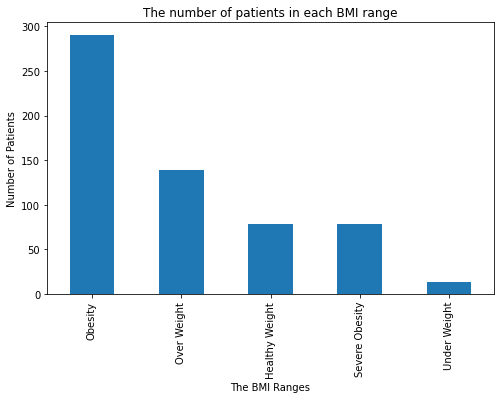

In [29]:
# plot graph
plt.figure(figsize=(8, 5))
range_count.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('Number of Patients')
plt.show()

>- Based on the graph above, most of the of the patients fall under the obesity category. The next category with a higher number of patients was the over weight category. The least was Under Weight category

### 2. What is the distribution of ages for patients captured in the data?

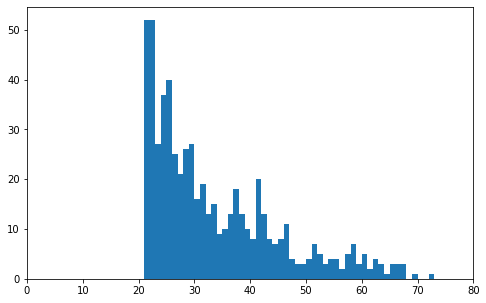

In [30]:

age_bins = np.arange(0, df_train['Age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df_train, x = 'Age', bins=age_bins);
plt.xlim(0, 80);

>-  From the distribution of ages most of the patients fell within the range 20 years to 40 years.

### 3. How many of the patients fall under the Normal, Elevated and High Blood Pressure?

In [31]:
# create a function to create a new column called blood pressure ranges
def blood_pressure_ranges(row):
    if row['Blood Pressure'] < 80:
        return 'normal'
    elif row['Blood Pressure'] >= 80 and row['Blood Pressure'] <= 89:
        return 'elevated'
    elif row['Blood Pressure'] >= 90:
        return 'high'


In [32]:
# create new column
df_train['Blood pressure category'] = df_train.apply(blood_pressure_ranges, axis=1)
df_train['Blood pressure category'].head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: Blood pressure category, dtype: object

In [33]:
BP_range = df_train['Blood pressure category'].value_counts()

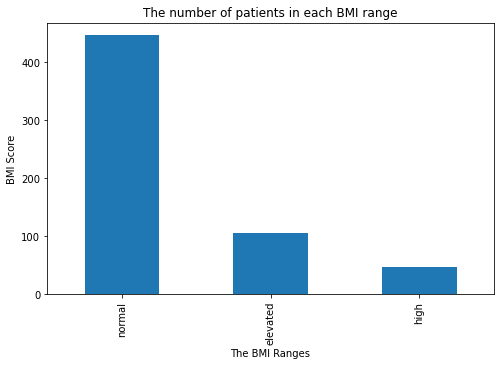

In [34]:
plt.figure(figsize=(8, 5))
BP_range.plot.bar()
plt.title('The number of patients in each BMI range')
plt.xlabel('The BMI Ranges')
plt.ylabel('BMI Score')
plt.show()

>- From the graph above more than 450 patients fell under the normal blood pressure category, followed by the elevated then high.

## Bivariate Analysis

### 4. Which age group recorded the highest number of Sepsis?

In [35]:
#age group count of patients with sepsis

age_group = df_train[df_train.Sepssis == 'Positive'].groupby('Age', as_index=False)['ID'].count()
age_group

,Age,ID
0,21,5
1,22,6
2,23,6
3,24,6
4,25,12
5,26,6
6,27,5
7,28,10
8,29,13
9,30,5


Text(0.5, 1.0, 'Age group of patients with sepsis')

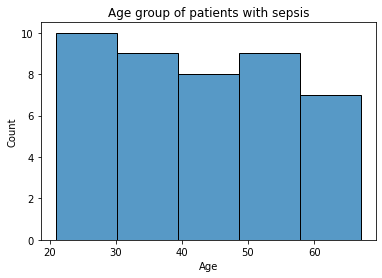

In [36]:
sns.histplot(data=age_group, x="Age", bins=5)
plt.title('Age group of patients with sepsis')

>- The age group with the highest number od sepsis was the ages between 20 - 30, followed by 48 - 57

<AxesSubplot:xlabel='Age', ylabel='count'>

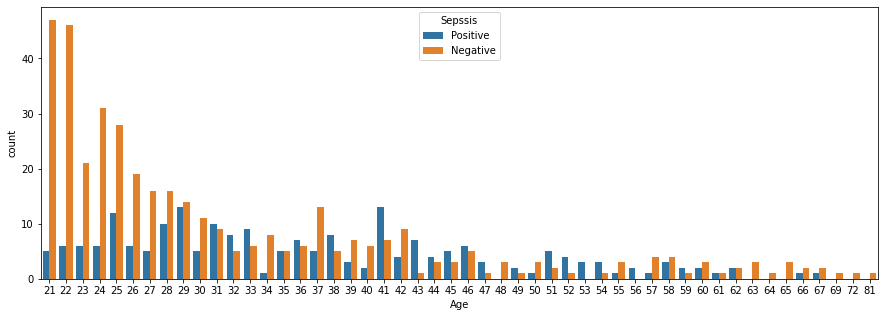

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Age', data=df_train, hue='Sepssis')

>- Among the individual ages, age 41 recorded the hisghest number of positive sepsis status.

### 5. How many of the patients with insurance had sepsis?

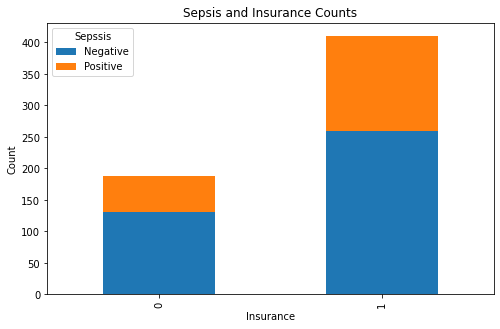

In [38]:
grouped = df_train.groupby(['Sepssis', 'Insurance'], as_index=False)['ID'].count()
# Pivot the data to have Sepsis as columns and Insurance as index
pivot = grouped.pivot(index='Insurance', columns='Sepssis', values='ID')
# Plotting
pivot.plot(kind='bar', stacked=True, figsize=(8, 5))
# Setting labels and title
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.title('Sepsis and Insurance Counts')
plt.show()


>- From the graph number of patients with insurance were more than those without insurance. More than half of the insured patients were sepsis negative and this was also the same for patients without insurance.

### 6. Is body mass directly correlated with a patients tendency to get sepsis? 

In [39]:
body_mass = df_train.groupby(['Sepssis', 'BMI Ranges'], as_index=False)['ID'].count()
body_mass

,Sepssis,BMI Ranges,ID
0,Negative,Healthy Weight,75
1,Negative,Obesity,159
2,Negative,Over Weight,110
3,Negative,Severe Obesity,35
4,Negative,Under Weight,12
5,Positive,Healthy Weight,4
6,Positive,Obesity,131
7,Positive,Over Weight,29
8,Positive,Severe Obesity,43
9,Positive,Under Weight,1


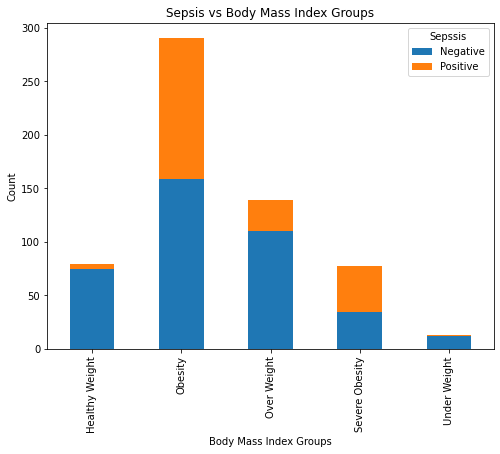

In [40]:
# Pivot the data to have Sepsis as columns and Insurance as index
bmi_pivot = body_mass.pivot(index='BMI Ranges', columns='Sepssis', values='ID')
# Plotting
bmi_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
# Setting labels and title
plt.xlabel('Body Mass Index Groups')
plt.ylabel('Count')
plt.title('Sepsis vs Body Mass Index Groups')
plt.show();

>- From the graph above, half of patients with obesity and severe obesity had sepsis. Less patients within healthy weight and under weight category had sepsis.  Could body mass ranges coupled with another feature affect the chances of a patients getting sepsis or not?

In [41]:
df_train.columns

Index(['ID', 'Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body Mass Index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis', 'BMI Ranges',
       'Blood pressure category'],
      dtype='object')

### 4. Is blood pressure correlated with a patients tendency to get sepsis? 

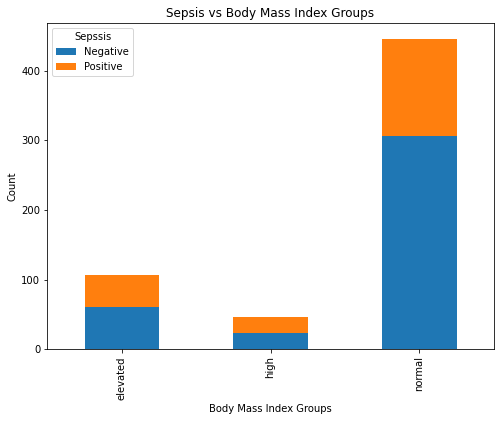

In [43]:

blood_pressure = df_train.groupby(['Sepssis', 'Blood pressure category'], as_index=False)['ID'].count()
blood_pressure

# Pivot the data to have Sepsis as columns and Insurance as index
bp_pivot = blood_pressure.pivot(index='Blood pressure category', columns='Sepssis', values='ID')
# Plotting
bp_pivot.plot(kind='bar', stacked=True, figsize=(8, 6))
# Setting labels and title
plt.xlabel('Body Mass Index Groups')
plt.ylabel('Count')
plt.title('Sepsis vs Body Mass Index Groups')
plt.show();



<!-- >- From the graph above, half of patients with obesity and severe obesity had sepsis. Less patients within healthy weight and under weight category had sepsis. Could body mass be affected the chances of a patients getting sepsis or not? -->

>- All group of blood pressure had some patients who were sepsis positive. Almost half of the people who fell under the high pressure category were sipsis posistive.

### 7. Is Body Mass Index affected by Age?

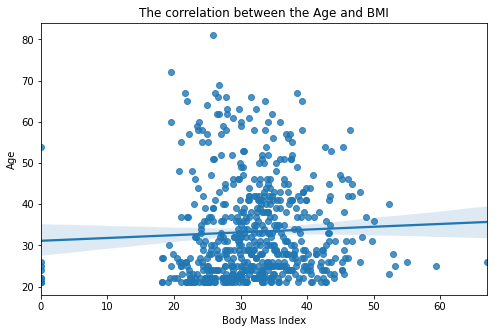

In [44]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Body Mass Index', y='Age', data=df_train)
plt.title('The correlation between the Age and BMI')
plt.show()

In [45]:
corr = df_train['Body Mass Index'].corr(df_train['Age'])
round(corr, 6)

0.046117

>- The correlation between ages and BMI values is very low. This means it is  very small. The correlation was 0.011801.

### 5. Is Blood Pressure affected by Age?

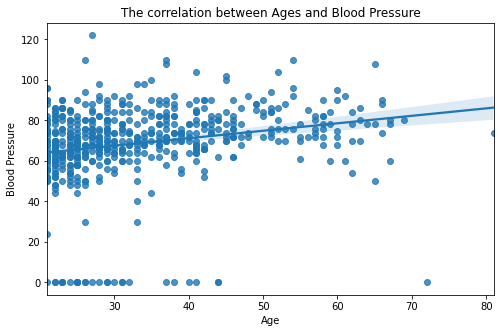

In [46]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Blood Pressure', data=df_train)
plt.title('The correlation between Ages and Blood Pressure')
plt.ylabel('Blood Pressure')
plt.show();

In [47]:
corr_ = df_train['Blood Pressure'].corr(df_train['Age'])
round(corr_, 6)

0.225625

>- From the graph there is a slight correlation between blood pressure and ages. The correaltion value is 0.225625

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

### 6. What is the relationship between Age and Body Mass Index Ranges and Sepsis?

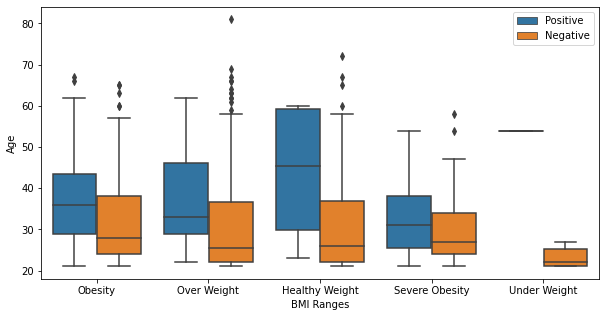

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train, y='Age', x='BMI Ranges', hue='Sepssis');
# plt.ylim(-10, 3500);
plt.legend();

>- From the graph above,  most people that tested positive for sepsis had healthy weights and fell between the ages of  25 to 60 but concentrated between ages of 30 and 59. The Obesity category which had more number of patients had patients between the ages of 28 - 44 who tested positive for sepsis.

### How does Blood Pressure and Plasma glucose affect the Sepssis 

In [49]:
# create function to plot facet grids
def plot_facet_grid(data, x, y, z, title, xlabel, ylabel):
    facet = sns.FacetGrid(data = data, col = z, col_wrap = 2, height = 5,
                     xlim = [10, 80], ylim = [-500, 9000])
    facet.map(plt.scatter, x, y, alpha= 1)
    facet.set_xlabels(xlabel)
    facet.set_ylabels(ylabel)
    facet.set(xlim=(0, 20))
    facet.set(ylim=(0, 200))
    facet.fig.suptitle(title, fontsize=14, fontweight='bold', y=1.05)

#     facet.fig.suptitle(title, )
    plt.show()

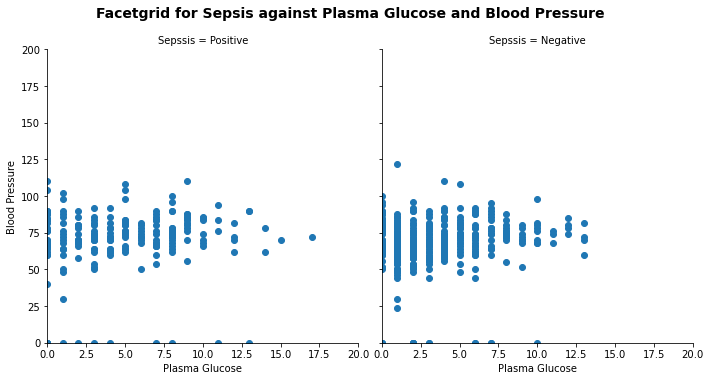

In [50]:
facet_sepssis = plot_facet_grid(df_train, 'Plasma Glucose', 'Blood Pressure', 'Sepssis', 
                                  'Facetgrid for Sepsis against Plasma Glucose and Blood Pressure', \
                                  'Plasma Glucose', 'Blood Pressure')
facet_sepssis

>- In both Positive and Negative Sepsis there is almost no correlation between Plasma and Blood Pressure

# Feature processing
Here is the section to **clean** and **process** the features of the dataset.

In [51]:
# display columns in dataframe
df.columns

Index(['ID', 'Plasma Glucose', 'Blood Work Result-1', 'Blood Pressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'Body Mass Index',
       'Blood Work Result-4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

In [52]:
# # Replace zeros in the dataset
# # get columns to replace 
# non_zero_columns = df.drop(columns=['Insurance']).columns

# # print columns to confirm
# print(non_zero_columns)
# # replace the zeros
# df[non_zero_columns] = df[non_zero_columns].replace(0, df[non_zero_columns].mean())


In [53]:
# number_of_zeros(df)

In [54]:
df.head(5)

,ID,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## Dataset Splitting

In [55]:
# Drop the ID column
df_ = df.drop(columns=['ID'])
df_['Insurance'] = df['Insurance'].astype('category')
# df_.head(2)

In [56]:
df_.dtypes

Plasma Glucose            int64
Blood Work Result-1       int64
Blood Pressure            int64
Blood Work Result-2       int64
Blood Work Result-3       int64
Body Mass Index         float64
Blood Work Result-4     float64
Age                       int64
Insurance              category
Sepssis                  object
dtype: object

In [57]:
#  change values in Sepsis column into numerical data
df_['Sepssis'] = (df_['Sepssis'] == 'Positive').astype(bool).astype(int)
df_['Sepssis'].unique()

array([1, 0])

In [58]:
# display data
df_.head(3)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1


In [59]:
df_corr = df_.corr()
df_corr['Sepssis'].sort_values(ascending=False)

Sepssis                1.000000
Blood Work Result-1    0.449719
Body Mass Index        0.315894
Age                    0.210234
Plasma Glucose         0.207115
Blood Work Result-4    0.181561
Blood Work Result-3    0.145892
Blood Work Result-2    0.075585
Blood Pressure         0.061086
Name: Sepssis, dtype: float64

#### Use train_test_split with a random_state, and add stratify for Classification

In [60]:
# Use train_test_split with a random_state, and add stratify for Classification

#spliting data into  80% train and  20% test
train, test = train_test_split(df_, test_size=0.2, random_state=42)

In [61]:
print(f'Train: {train.shape}, Test: {test.shape}')

Train: (479, 10), Test: (120, 10)


In [62]:
# create features and targets from the train data
X_train = train.drop(columns=['Sepssis'])
y_train = train['Sepssis'].copy()

# create features and targets from test data
X_test = test.drop(columns=['Sepssis'])
y_test = test['Sepssis'].copy()


In [63]:
# display head fo the train features dataframe
X_train.head()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
145,0,102,75,23,0,0.0,0.572,21,1
9,8,125,96,0,0,0.0,0.232,54,1
375,12,140,82,43,325,39.2,0.528,58,1
522,6,114,0,0,0,0.0,0.189,26,1
188,8,109,76,39,114,27.9,0.640,31,0


In [64]:
# displayhead for the test features dataframe

X_test.head()

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance
110,3,171,72,33,135,33.3,0.199,24,1
419,3,129,64,29,115,26.4,0.219,28,1
564,0,91,80,0,0,32.4,0.601,27,0
77,5,95,72,33,0,37.7,0.370,27,1
181,0,119,64,18,92,34.9,0.725,23,0


## New Features Creation

In [65]:
def print_min_max(data):
    for col in data.columns:
        print(f'min: {data[col].min()}, max: {data[col].max()}')

In [66]:
print_min_max(df[['Body Mass Index', 'Blood Pressure', 'Plasma Glucose']])

min: 0.0, max: 67.1
min: 0, max: 122
min: 0, max: 17


#### create features

In [67]:
# get the products of the all the numerical columns

X_train['All-Product']  = X_train['Blood Work Result-4'] * X_train['Blood Work Result-1']*\
X_train['Blood Work Result-2']* X_train['Blood Work Result-3'] * X_train['Plasma Glucose']\
*X_train['Blood Pressure'] * X_train['Age']* X_train['Body Mass Index']

In [68]:
X_train.head(3)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,All-Product
145,0,102,75,23,0,0.0,0.572,21,1,0.000000e+00
9,8,125,96,0,0,0.0,0.232,54,1,0.000000e+00
375,12,140,82,43,325,39.2,0.528,58,1,2.311122e+12


In [69]:

X_test['All-Product']  = X_test['Blood Work Result-4'] * X_test['Blood Work Result-1']*\
X_test['Blood Work Result-2']* X_test['Blood Work Result-3'] * X_test['Plasma Glucose']\
*X_test['Blood Pressure'] * X_test['Age']* X_test['Body Mass Index']

In [70]:
X_test.head(3)

,Plasma Glucose,Blood Work Result-1,Blood Pressure,Blood Work Result-2,Blood Work Result-3,Body Mass Index,Blood Work Result-4,Age,Insurance,All-Product
110,3,171,72,33,135,33.3,0.199,24,1,2.617014e+10
419,3,129,64,29,115,26.4,0.219,28,1,1.337189e+10
564,0,91,80,0,0,32.4,0.601,27,0,0.000000e+00


In [71]:
# get the categories from the products of all numerical feature
blood_max = X_train['All-Product'].max()
bin_max = 3500000000000
# create a new column 'Age Group'
all_labels =['{0}-{1}'.format(i, i+500000000000) for i in range(0, round(blood_max),500000000000)]
X_train['All-Product_range'] = pd.cut(X_train['All-Product'], bins=(range(0, bin_max, 500000000000)), right=False, labels=all_labels)
X_test['All-Product_range'] = pd.cut(X_test['All-Product'], bins=(range(0, bin_max, 500000000000)), right=False, labels=all_labels)

print(all_labels)
print(blood_max)

['0-500000000000', '500000000000-1000000000000', '1000000000000-1500000000000', '1500000000000-2000000000000', '2000000000000-2500000000000', '2500000000000-3000000000000']
2714705253292.0312


In [72]:
# get the min and max o fthe ages
age_min = df['Age'].min()
age_max = df['Age'].max()

# create a new column 'Age Group'
age_labels =['{0}-{1}'.format(i, i+20) for i in range(0, age_max,20)]
X_train['Age Group'] = pd.cut(X_train['Age'], bins=(range(0, 120, 20)), right=False, labels=age_labels)
X_test['Age Group'] = pd.cut(X_test['Age'], bins=(range(0, 120, 20)), right=False, labels=age_labels)

print(age_labels)

['0-20', '20-40', '40-60', '60-80', '80-100']


In [73]:
# get the max of the bmi
bmi_max = df['Body Mass Index'].max()
# create a new column 'Age Group'
labels =['{0}-{1}'.format(i, i+30) for i in range(0, round(bmi_max),30)]
X_train['BMI_range'] = pd.cut(X_train['Body Mass Index'], bins=(range(0, 120, 30)), right=False, labels=labels)
X_test['BMI_range'] = pd.cut(X_test['Body Mass Index'], bins=(range(0, 120, 30)), right=False, labels=labels)

print(labels)
print(bmi_max)

['0-30', '30-60', '60-90']
67.1


In [74]:

# get the max of blood pressure
bp_max = df['Blood Pressure'].max()
# create a new column 'Age Group'
labels =['{0}-{1}'.format(i, i+50) for i in range(0, round(bp_max),50)]
X_train['BP_range'] = pd.cut(X_train['Blood Pressure'], bins=(range(0, 200, 50)), right=False, labels=labels)
X_test['BP_range'] = pd.cut(X_test['Blood Pressure'], bins=(range(0, 200, 50)), right=False, labels=labels)

print(labels)


['0-50', '50-100', '100-150']


In [75]:
# get max of plasma glucose
# age_min = df['Age'].min()
pg_max = df['Plasma Glucose'].max()
# create a new column 'Age Group'
labels =['{0}-{1}'.format(i, i+7) for i in range(0, round(pg_max),7)]
X_train['PG_range'] = pd.cut(X_train['Plasma Glucose'], bins=(range(0, 28, 7)), right=False, labels=labels)
X_test['PG_range'] = pd.cut(X_test['Plasma Glucose'], bins=(range(0, 28, 7)), right=False, labels=labels)

print(labels)
# print(blood_max)

['0-7', '7-14', '14-21']


In [76]:
# drop columns 
X_train = X_train.drop(columns=['Blood Pressure', 'Age', 'Body Mass Index','Plasma Glucose', 'All-Product', 'Blood Work Result-3', 'Blood Work Result-2'])
X_test = X_test.drop(columns=['Blood Pressure', 'Age', 'Body Mass Index', 'Plasma Glucose', 'All-Product', 'Blood Work Result-3', 'Blood Work Result-2'])

In [77]:
X_test.head(3)

,Blood Work Result-1,Blood Work Result-4,Insurance,All-Product_range,Age Group,BMI_range,BP_range,PG_range
110,171,0.199,1,0-500000000000,20-40,30-60,50-100,0-7
419,129,0.219,1,0-500000000000,20-40,0-30,50-100,0-7
564,91,0.601,0,0-500000000000,20-40,30-60,50-100,0-7


In [78]:
X_train.head(3)

,Blood Work Result-1,Blood Work Result-4,Insurance,All-Product_range,Age Group,BMI_range,BP_range,PG_range
145,102,0.572,1,0-500000000000,20-40,0-30,50-100,0-7
9,125,0.232,1,0-500000000000,40-60,0-30,50-100,7-14
375,140,0.528,1,2000000000000-2500000000000,40-60,30-60,50-100,7-14


## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [79]:
# check and confirm the shape of the train and test data
train.shape, test.shape

((479, 10), (120, 10))

In [80]:
# select the categorical columns from train and test data for encoding
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
test_cat_cols = X_test.select_dtypes(include=['object', 'category']).columns
train_cat_cols == test_cat_cols

array([ True,  True,  True,  True,  True,  True])

In [81]:
# select numerical columns from the train and test dataset
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns
test_num_cols=X_test.select_dtypes(exclude=['object', 'category']).columns

# # confirm if numerical columns are same for test and train data
test_num_cols == train_num_cols

array([ True,  True])

In [82]:
X_train.columns

Index(['Blood Work Result-1', 'Blood Work Result-4', 'Insurance',
       'All-Product_range', 'Age Group', 'BMI_range', 'BP_range', 'PG_range'],
      dtype='object')

In [83]:
# create variables to hold numerical and categorical columns 
num_attribs = list(train_num_cols)
cat_attribs = list(train_cat_cols)
print(num_attribs, cat_attribs)

['Blood Work Result-1', 'Blood Work Result-4'] ['Insurance', 'All-Product_range', 'Age Group', 'BMI_range', 'BP_range', 'PG_range']


#### create a pipeline

In [84]:
#create a numerical pipeline to standardize and impute the missinf in the numerical columns
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="mean")),('std_scaler', StandardScaler())])

#create a categorical pipeline to encode and impute the missing in the numerical columns
cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy="most_frequent")),('cat_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [85]:
# Create a fullpipeline by combining numerical and catagorical pioeline
full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs), ("categorical",cat_pipeline, cat_attribs)], )

In [86]:
# use create pipeline to transform train and test features
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [87]:
X_train_prepared

array([[-0.5620614 ,  0.29869943,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.16592243, -0.76048427,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.64069449,  0.1616286 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.59371287,  2.05569826,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.67234596, -0.84459591,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.16592243, -0.66702688,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

#### creat dataframes from transformer output

In [88]:
# get categorical columns after transformation
cat_features = full_pipeline.named_transformers_['categorical']['cat_encoder'].get_feature_names()
cat_features

array(['x0_0', 'x0_1', 'x1_0-500000000000',
       'x1_1000000000000-1500000000000', 'x1_1500000000000-2000000000000',
       'x1_2000000000000-2500000000000', 'x1_2500000000000-3000000000000',
       'x1_500000000000-1000000000000', 'x2_20-40', 'x2_40-60',
       'x2_60-80', 'x2_80-100', 'x3_0-30', 'x3_30-60', 'x3_60-90',
       'x4_0-50', 'x4_100-150', 'x4_50-100', 'x5_0-7', 'x5_14-21',
       'x5_7-14'], dtype=object)

In [89]:
# combine numerical and categorical columns
columns_ = np.concatenate([train_num_cols, cat_features])

In [90]:
X_train_df = pd.DataFrame(X_train_prepared, columns=columns_)
X_train_df = X_train_df.rename(columns={'x0_0':'Insurance_0', 'x0_1': 'Insurance_1'})
X_train_df.head()

,Blood Work Result-1,Blood Work Result-4,Insurance_0,Insurance_1,x1_0-500000000000,x1_1000000000000-1500000000000,x1_1500000000000-2000000000000,x1_2000000000000-2500000000000,x1_2500000000000-3000000000000,x1_500000000000-1000000000000,...,x2_80-100,x3_0-30,x3_30-60,x3_60-90,x4_0-50,x4_100-150,x4_50-100,x5_0-7,x5_14-21,x5_7-14
0,-0.562061,0.298699,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.165922,-0.760484,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.640694,0.161629,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.182244,-0.894440,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.340501,0.510536,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [91]:
X_train_df.shape

(479, 23)

In [92]:
# create test dataframe
X_test_df = pd.DataFrame(X_test_prepared, columns=columns_)
X_test_df = X_test_df.rename(columns={'x0_0':'Insurance_0', 'x0_1': 'Insurance_1'})
X_test_df.head()

,Blood Work Result-1,Blood Work Result-4,Insurance_0,Insurance_1,x1_0-500000000000,x1_1000000000000-1500000000000,x1_1500000000000-2000000000000,x1_2000000000000-2500000000000,x1_2500000000000-3000000000000,x1_500000000000-1000000000000,...,x2_80-100,x3_0-30,x3_30-60,x3_60-90,x4_0-50,x4_100-150,x4_50-100,x5_0-7,x5_14-21,x5_7-14
0,1.621890,-0.863287,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.292528,-0.800982,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.910228,0.389042,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.783622,-0.330580,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.023986,0.775332,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [93]:
# Code here
len(X_test_df)

120

## Optional: Train Dataset Balancing 

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Logistic Regression

Please, keep the following structure to try all the model you want.

### Create the Model

In [94]:
lgr_model = LogisticRegression()

### Train the Model

In [95]:
# Use the .fit method to train the model
lgr_model.fit(X_train_df, y_train)

LogisticRegression()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [96]:
def evaluate_model(model, x_test, y_test):
    pred = model.predict(x_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    return accuracy, f1, precision, recall, auc_score


In [97]:
accuracy, f1, precision, recall, auc_score = evaluate_model(lgr_model, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.825, 0.7469879518072289, 0.775, 0.7209302325581395, 0.8091211114466929)

In [98]:
results = pd.DataFrame([['Logistic Regression Classifier', accuracy, f1, precision, recall, auc_score]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
results

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier,0.825,0.746988,0.775,0.72093,0.809121


>- 

In [99]:
roc_auc_score(y_test, lgr_model.predict_proba(X_test_df)[:, 1])

0.8091211114466929

In [100]:
log_prob = lgr_model.predict_proba(X_test_df)[:, 1]

In [101]:
threshold=0.3
y_pred = np.where(log_prob >= threshold, 1, 0)
recall = recall_score(y_true=y_test, y_pred=y_pred)

print(recall)

0.813953488372093


In [102]:
accuracy_score(y_test, y_pred)

0.725

In [103]:
precision_score(y_test, y_pred)

0.5833333333333334

## XBoost

Please, keep the following structure to try all the model you want.

### Create the Model

In [104]:
xgb_model = XGBClassifier()

### Train the Model

In [105]:
# Use the .fit method
xgb_model.fit(X_train_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [106]:
accuracy, f1, precision, recall, auc_score = evaluate_model(xgb_model, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.6666666666666666,
 0.5121951219512196,
 0.5384615384615384,
 0.4883720930232558,
 0.707641196013289)

In [107]:
model_result = pd.DataFrame([['XGBoost Classifier', accuracy, f1, precision, recall, auc_score]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier,0.825000,0.746988,0.775000,0.720930,0.809121
0,XGBoost Classifier,0.666667,0.512195,0.538462,0.488372,0.707641


>-

## Support Vector Machine

### Create the Model

In [108]:
# Create the svm  model
from sklearn.svm import SVC
svm_model = SVC(probability=True)

### Train the Model

In [109]:
# Use the .fit method
svm_model.fit(X_train_df, y_train, )

SVC(probability=True)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [110]:
accuracy, f1, precision, recall, auc_score = evaluate_model(svm_model, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.7833333333333333,
 0.6829268292682927,
 0.717948717948718,
 0.6511627906976745,
 0.7979462398067049)

In [111]:
model_result = pd.DataFrame([['Support Vector Machine', accuracy, f1, precision, recall, auc_score]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier,0.825000,0.746988,0.775000,0.720930,0.809121
0,XGBoost Classifier,0.666667,0.512195,0.538462,0.488372,0.707641
0,Support Vector Machine,0.783333,0.682927,0.717949,0.651163,0.797946


>- 

## Gradient Boosting 

Please, keep the following structure to try all the model you want.

### Create the Model

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

### Train the Model

In [113]:
# Use the .fit method
gb_model.fit(X_train_df, y_train)

GradientBoostingClassifier()

In [114]:
accuracy, f1, precision, recall, auc_score = evaluate_model(gb_model, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.725,
 0.611764705882353,
 0.6190476190476191,
 0.6046511627906976,
 0.7644216248867411)

In [115]:
model_result = pd.DataFrame([['Gradient Boosting Classifier', accuracy, f1, precision, recall, auc_score]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier,0.825000,0.746988,0.775000,0.720930,0.809121
0,XGBoost Classifier,0.666667,0.512195,0.538462,0.488372,0.707641
0,Support Vector Machine,0.783333,0.682927,0.717949,0.651163,0.797946
0,Gradient Boosting Classifier,0.725000,0.611765,0.619048,0.604651,0.764422


## Decision tree

### Create the Model

In [116]:
# Code here
dtc = DecisionTreeClassifier()

### Train the Model

In [117]:
# Use the .fit method
dtc.fit(X_train_df, y_train)

DecisionTreeClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [118]:
accuracy, f1, precision, recall, auc_score = evaluate_model(dtc, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.6333333333333333,
 0.46341463414634154,
 0.48717948717948717,
 0.4418604651162791,
 0.5910601026880096)

In [119]:
model_result = pd.DataFrame([['Decision Tree Classifier', accuracy, f1, precision, recall, auc_score]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier,0.825000,0.746988,0.775000,0.720930,0.809121
0,XGBoost Classifier,0.666667,0.512195,0.538462,0.488372,0.707641
0,Support Vector Machine,0.783333,0.682927,0.717949,0.651163,0.797946
0,Gradient Boosting Classifier,0.725000,0.611765,0.619048,0.604651,0.764422
0,Decision Tree Classifier,0.633333,0.463415,0.487179,0.441860,0.591060


## Random Forest

### Create the Model

In [120]:
# Code here
rfc = RandomForestClassifier()

### Train the Model

In [121]:
# Use the .fit method
rfc.fit(X_train_df, y_train)

RandomForestClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

In [122]:
accuracy, f1, precision, recall, auc_score = evaluate_model(rfc, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.7083333333333334,
 0.6153846153846155,
 0.5833333333333334,
 0.6511627906976745,
 0.7783147085472666)

In [123]:
model_result = pd.DataFrame([['Random Forest Classifier', accuracy, f1, precision, recall, auc_score]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
results = results.append(model_result)
results

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier,0.825000,0.746988,0.775000,0.720930,0.809121
0,XGBoost Classifier,0.666667,0.512195,0.538462,0.488372,0.707641
0,Support Vector Machine,0.783333,0.682927,0.717949,0.651163,0.797946
0,Gradient Boosting Classifier,0.725000,0.611765,0.619048,0.604651,0.764422
0,Decision Tree Classifier,0.633333,0.463415,0.487179,0.441860,0.591060
0,Random Forest Classifier,0.708333,0.615385,0.583333,0.651163,0.778315


>- 

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [124]:
# # make f2 a scorer
f2_scorer_ = make_scorer(fbeta_score, beta=2)
accuracy_score_ = make_scorer(accuracy_score)
f1_score_ = make_scorer(f1_score)
precision_score_ = make_scorer(precision_score)
recall_ = make_scorer(recall_score)

scoring = {
    'accuracy': accuracy_score_,
    'f1_score': f1_score_,
    'precision': precision_score_,
    'f2_score': f2_scorer_,
    'recall': recall_
}

### Model Tuning for Logistic Rgression Classifier

In [125]:

weight = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
unique_labels = np.unique(y_train)
weight1 = dict(zip(unique_labels, weight))

weight2 = {0: 0.6, 1: 1.6}
weight3 = {0: 0.75, 1: 1.8}

class_weights = [weight3]


In [126]:
param_grid= [{'penalty': ['l1', 'l2'],\
             'C': [0.001, 1, 10, 50, 80, 100], 'intercept_scaling':[1, 0.4, 5, 10],
              'max_iter': [100, 500, 1000, 8, 18], 'class_weight':class_weights,
              'solver':['saga', 'liblinear', 'newton-cholesky'], 
              'l1_ratio': np.arange(0, 1, 0.2) , 'random_state':[126, 140, 156]}]

In [127]:
# create a bayessearchcv to finetune the logistic regression model
logistic_grid_search = GridSearchCV(lgr_model,param_grid, scoring=scoring, cv=10, return_train_score=True, refit='accuracy')

In [128]:
# train the model
logistic_grid_search.fit(X_train_df, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 1, 10, 50, 80, 100],
                          'class_weight': [{0: 0.75, 1: 1.8}],
                          'intercept_scaling': [1, 0.4, 5, 10],
                          'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8]),
                          'max_iter': [100, 500, 1000, 8, 18],
                          'penalty': ['l1', 'l2'],
                          'random_state': [126, 140, 156],
                          'solver': ['saga', 'liblinear', 'newton-cholesky']}],
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'f2_score': make_scorer(fbeta_score, beta=2),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [129]:
# get the best parameter from the bayesearch
best_lgr = logistic_grid_search.best_estimator_
best_lgr

LogisticRegression(C=1, class_weight={0: 0.75, 1: 1.8}, l1_ratio=0.0,
                   max_iter=8, penalty='l1', random_state=140,
                   solver='liblinear')

In [130]:
accuracy, f1, precision, recall, auc_score = evaluate_model(best_lgr, X_test_df, y_test)

In [131]:
accuracy, f1, precision, recall, auc_score

(0.7083333333333334,
 0.6666666666666667,
 0.5645161290322581,
 0.813953488372093,
 0.8091211114466929)

In [132]:
tuned_results_gcv = pd.DataFrame([['Logistic Regression Classifier-finetuned', accuracy, f1, precision, recall, auc_score
]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])

In [133]:
tuned_results_gcv

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier-finetuned,0.708333,0.666667,0.564516,0.813953,0.809121


In [134]:
lgb = LogisticRegression(class_weight={0: 0.75, 1: 1.8})

In [135]:
lgb.fit(X_train_df, y_train)

LogisticRegression(class_weight={0: 0.75, 1: 1.8})

In [136]:
accuracy11, f11, precision11, recall11, auc_score11 = evaluate_model(lgb, X_test_df, y_test)
accuracy11, f11, precision11, recall11, auc_score11 

(0.7166666666666667,
 0.673076923076923,
 0.5737704918032787,
 0.813953488372093,
 0.8088190878888553)

In [137]:
accuracy11, f11, precision11, recall11, auc_score11 = evaluate_model(lgb, X_train_df, y_train)
accuracy11, f11, precision11, recall11, auc_score11 

(0.7640918580375783,
 0.7002652519893899,
 0.6226415094339622,
 0.8,
 0.8481760277938621)

### Model Tuning for Support  Vector Machine Classifier

In [139]:
# parameters for tuning
param_grid_svm= [{'C': [0.01,5, 6,10,25], 'gamma':[ 'scale', 'auto'],\
              'max_iter': [16, 8, 100, 200, 1000], 'class_weight':class_weights, \
              'kernel':['sigmoid', 'poly'], 'probability': [True], 'random_state': [126, 156, 90], \
              'tol': 10.0 ** -np.arange(1, 7), 'coef0':np.arange(0,1,0.2) }]



In [140]:
# create a bayessearchcv to finetune the Support Vectors Machines regression model
svm_bayes_search = GridSearchCV(svm_model,param_grid_svm, scoring=scoring, cv=10, return_train_score=True, refit='accuracy')

In [141]:
# train the model
svm_bayes_search.fit(X_train_df, y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid=[{'C': [0.01, 5, 6, 10, 25],
                          'class_weight': [{0: 0.75, 1: 1.8}],
                          'coef0': array([0. , 0.2, 0.4, 0.6, 0.8]),
                          'gamma': ['scale', 'auto'],
                          'kernel': ['sigmoid', 'poly'],
                          'max_iter': [16, 8, 100, 200, 1000],
                          'probability': [True], 'random_state': [126, 156, 90],
                          'tol': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])}],
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'f2_score': make_scorer(fbeta_score, beta=2),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [142]:
# get the bbest eestimator
svm_best = svm_bayes_search.best_estimator_
svm_best

SVC(C=0.01, class_weight={0: 0.75, 1: 1.8}, coef0=0.8, kernel='poly',
    max_iter=1000, probability=True, random_state=126, tol=0.01)

In [143]:
accuracy, f1, precision, recall, auc_score = evaluate_model(svm_best, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score


(0.675, 0.6355140186915887, 0.53125, 0.7906976744186046, 0.8070069465418304)

In [145]:
tuned_svm = pd.DataFrame([['Support Vector Machine', accuracy, f1, precision, recall, auc_score
]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
tuned_results_gcv = tuned_results_gcv.append(tuned_svm)

In [146]:
tuned_results_gcv

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier-finetuned,0.708333,0.666667,0.564516,0.813953,0.809121
0,Support Vector Machine,0.675000,0.635514,0.531250,0.790698,0.807007


### Model Tuning for Random Forest Classifier

In [147]:
# Create the parameter bayes search 
param_grid_rfc = {
    'bootstrap': [True], 
    'max_features': [2, 3, 9], 
    'min_samples_split': [8, 10, 12], 
    'n_estimators': [100, 200, 300, 500], 
    'random_state':[100,  120, 150], 
    'min_samples_leaf':[8, 6, 10, 7],
    'max_depth': [6, 8, 9, 80, 90, 100],
    'random_state': [126, 156],
    'class_weight':class_weights
}

In [148]:
import gc
gc.collect()

143

In [149]:
# create a bayessearchcv to finetune the Support Vectors Machines regression model

rfc_grid_search = GridSearchCV(rfc, param_grid_rfc, scoring=scoring, cv=7, return_train_score=True, refit='accuracy')

In [150]:
# train the model
rfc_grid_search.fit(X_train_df, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'class_weight': [{0: 0.75, 1: 1.8}],
                         'max_depth': [6, 8, 9, 80, 90, 100],
                         'max_features': [2, 3, 9],
                         'min_samples_leaf': [8, 6, 10, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500],
                         'random_state': [126, 156]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score),
                      'f2_score': make_scorer(fbeta_score, beta=2),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [151]:
# # get the bbest eestimator
best_rfc = rfc_grid_search.best_estimator_
best_rfc

RandomForestClassifier(class_weight={0: 0.75, 1: 1.8}, max_depth=80,
                       max_features=9, min_samples_leaf=6, min_samples_split=8,
                       random_state=126)

In [152]:
accuracy, f1, precision, recall, auc_score = evaluate_model(best_rfc, X_test_df, y_test)
accuracy, f1, precision, recall, auc_score

(0.7333333333333333,
 0.6666666666666666,
 0.6037735849056604,
 0.7441860465116279,
 0.783751132588342)

In [153]:
tuned_rfc = pd.DataFrame([['Random Forest Classifier', accuracy, f1, precision, recall, auc_score
]], columns = ['Model', 'Accuracy', 'F1_score', 'Precision', 'Recall', 'AUC_score'])
tuned_results_gcv = tuned_results_gcv.append(tuned_rfc)

In [154]:
tuned_results_gcv

,Model,Accuracy,F1_score,Precision,Recall,AUC_score
0,Logistic Regression Classifier-finetuned,0.708333,0.666667,0.564516,0.813953,0.809121
0,Support Vector Machine,0.675000,0.635514,0.531250,0.790698,0.807007
0,Random Forest Classifier,0.733333,0.666667,0.603774,0.744186,0.783751


>- Based on the results of the finetuned models lodistic regression had the best recall, auc_score. Considering the fact the data is imbalance the model with the highest recall is selected.

# Interpret Model

In [165]:
shap.initjs()

In [166]:
explainer = shap.Explainer(best_lgr.predict, X_train_df)
shap_values = explainer(X_test_df)

In [170]:
def features_explainer(index, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[index])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[index])
    else:
        return 'Select a valid type of plot: "condensed" or "waterfall"'

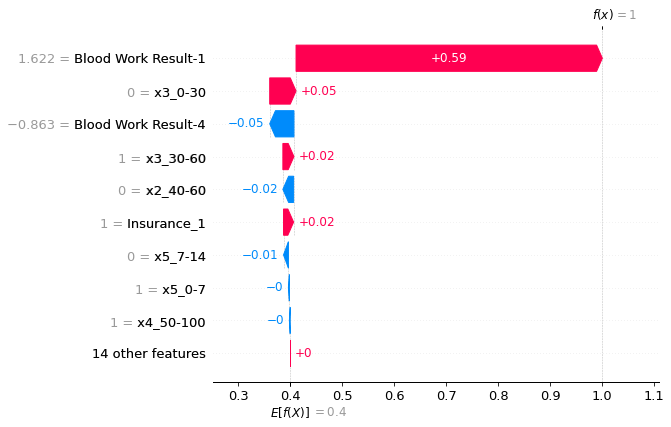

In [171]:
features_explainer(0, type='waterfall')

Loooking at the graph above, the most important feature for predicting the first sample/row of the validation data is Blood work results 1 followed by the x_30-60-category of bmi values between 0 and 30.

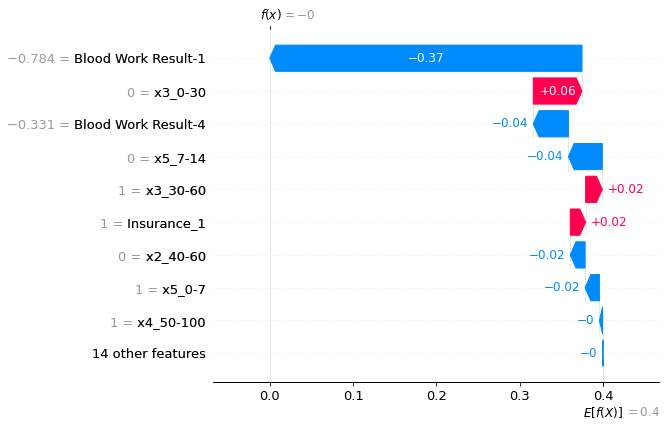

In [172]:
features_explainer(3, type='waterfall')

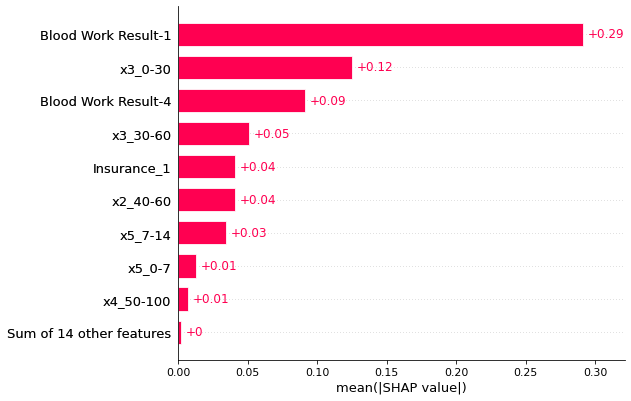

In [197]:
# Let's plot the featureof importance for the logistic regression model
shap.plots.bar(shap_values)

>- This graph considers the whole test data.The 5 most important features in predicting the test data are in the order of Blood work results-1, x3_0–30(bmi values between 0 and 30), Blood work results-1, x3_30–60 and Insurance_1.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [176]:
# Save the model and the columntransformer

# Navigate to the desired directory
directory = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'src', 'assets', 'ml_components'))

# Save the model as a pickle file
filename = os.path.join(directory, 'model-1.pkl')
pickle.dump(best_lgr, open(filename, 'wb'))


In [177]:
filename2 = os.path.join(directory, 'preprocessor.pkl')
pickle.dump(full_pipeline, open(filename2, 'wb') )

In [181]:
new_cols = ['Blood Work Result-1', 'Blood Work Result-4', 'Insurance_0',
       'Insurance_1', 'All-Product_0-500000000000',
       'All-Product_1000000000000-1500000000000', 'All-Product_1500000000000-2000000000000',
       'All-Product_2000000000000-2500000000000', 'All-Product_2500000000000-3000000000000',
       'All-Product_500000000000-1000000000000', 'Age_20-40', 'Age_40-60',
       'Age_60-80', 'Age_80-100', 'BMI_0-30', 'BMI_30-60', 'BMI_60-90',
       'Blood-Pressure_0-50', 'Blood-Pressure_100-150', 'Blood-Pressure_50-100', 'Plasma-Glucose_0-7', 'Plasma-Glucose_14-21',
       'Plasma-Glucose_7-14']

In [182]:
new_data_cols = X_train_df.rename(columns=dict(zip(X_train_df.columns, new_cols)))

In [183]:
new_data_cols.columns

Index(['Blood Work Result-1', 'Blood Work Result-4', 'Insurance_0',
       'Insurance_1', 'All-Product_0-500000000000',
       'All-Product_1000000000000-1500000000000',
       'All-Product_1500000000000-2000000000000',
       'All-Product_2000000000000-2500000000000',
       'All-Product_2500000000000-3000000000000',
       'All-Product_500000000000-1000000000000', 'Age_20-40', 'Age_40-60',
       'Age_60-80', 'Age_80-100', 'BMI_0-30', 'BMI_30-60', 'BMI_60-90',
       'Blood-Pressure_0-50', 'Blood-Pressure_100-150',
       'Blood-Pressure_50-100', 'Plasma-Glucose_0-7', 'Plasma-Glucose_14-21',
       'Plasma-Glucose_7-14'],
      dtype='object')

In [185]:
new_data_cols.columns[:2]

Index(['Blood Work Result-1', 'Blood Work Result-4'], dtype='object')

In [186]:
new_data_cols.columns[2:]

Index(['Insurance_0', 'Insurance_1', 'All-Product_0-500000000000',
       'All-Product_1000000000000-1500000000000',
       'All-Product_1500000000000-2000000000000',
       'All-Product_2000000000000-2500000000000',
       'All-Product_2500000000000-3000000000000',
       'All-Product_500000000000-1000000000000', 'Age_20-40', 'Age_40-60',
       'Age_60-80', 'Age_80-100', 'BMI_0-30', 'BMI_30-60', 'BMI_60-90',
       'Blood-Pressure_0-50', 'Blood-Pressure_100-150',
       'Blood-Pressure_50-100', 'Plasma-Glucose_0-7', 'Plasma-Glucose_14-21',
       'Plasma-Glucose_7-14'],
      dtype='object')

In [195]:
properties = {}

properties['train features'] = {
    'numerical features': list(new_data_cols.columns[:2]),
    'categorical feature': list(new_data_cols.columns[2:])
}
properties['max_values'] = {'bp': bp_max, 
                            'pg':pg_max, 
                            'bmi':bmi_max, 
                            'age':age_max,
                           'all product': blood_max}
properties['original columns'] = list(df_.drop(columns=['Sepssis']).columns)


filename3 = os.path.join(directory, 'other-components.pkl')
pickle.dump(properties, open(filename3, 'wb') )

In [196]:
properties

{'train features': {'numerical features': ['Blood Work Result-1',
   'Blood Work Result-4'],
  'categorical feature': ['Insurance_0',
   'Insurance_1',
   'All-Product_0-500000000000',
   'All-Product_1000000000000-1500000000000',
   'All-Product_1500000000000-2000000000000',
   'All-Product_2000000000000-2500000000000',
   'All-Product_2500000000000-3000000000000',
   'All-Product_500000000000-1000000000000',
   'Age_20-40',
   'Age_40-60',
   'Age_60-80',
   'Age_80-100',
   'BMI_0-30',
   'BMI_30-60',
   'BMI_60-90',
   'Blood-Pressure_0-50',
   'Blood-Pressure_100-150',
   'Blood-Pressure_50-100',
   'Plasma-Glucose_0-7',
   'Plasma-Glucose_14-21',
   'Plasma-Glucose_7-14']},
 'max_values': {'bp': 122,
  'pg': 17,
  'bmi': 67.1,
  'age': 81,
  'all product': 2714705253292.0312},
 'original columns': ['Plasma Glucose',
  'Blood Work Result-1',
  'Blood Pressure',
  'Blood Work Result-2',
  'Blood Work Result-3',
  'Body Mass Index',
  'Blood Work Result-4',
  'Age',
  'Insurance']}

In [203]:
import session_info

session_info.show()